In [1]:
import scipy.stats as sc
import scipy.optimize as op
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import autograd
from sympy import *
import random

<ipython-input-2-0a2cc6cd64d6>:15: RuntimeWarning: divide by zero encountered in power
  return a * b * (x ** (a - 1)) * ((1 - x ** a) ** (b - 1))


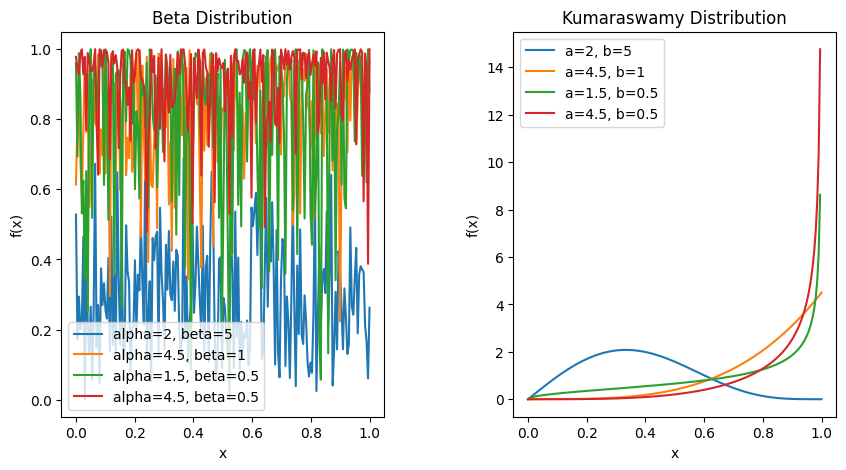

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values to plot
x_values = np.linspace(0, 1, 200)

# Define the parameters for the Beta distribution
alpha_beta_params = [(2, 5), (4.5, 1), (1.5, 0.5), (4.5, 0.5)]

# Define the parameters for the Kumaraswamy distribution
a_b_params = [(2, 5), (4.5, 1), (1.5, 0.5), (4.5, 0.5)]

# Define the PDF function for the Kumaraswamy distribution
def kumaraswamy_pdf(x, a, b):
    return a * b * (x ** (a - 1)) * ((1 - x ** a) ** (b - 1))

# Create a subplot with two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the Beta distribution on the left subplot
axes[0].set_title('Beta Distribution')
for alpha, beta in alpha_beta_params:
    pdf_values = np.random.beta(alpha, beta, size=len(x_values))
    axes[0].plot(x_values, pdf_values, label=f"alpha={alpha}, beta={beta}")
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].legend()

# Plot the Kumaraswamy distribution on the right subplot
axes[1].set_title('Kumaraswamy Distribution')
for a, b in a_b_params:
    pdf_values = kumaraswamy_pdf(x_values, a, b)
    axes[1].plot(x_values, pdf_values, label=f"a={a}, b={b}")
axes[1].set_xlabel('x')
axes[1].set_ylabel('f(x)')
axes[1].legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


In [ ]:
!pip install pymcmcstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 KB 2.7 MB/s eta 0:00:00


In [ ]:
def generate_kumarswamyexp(alpha, beta, gamma,pt=100000):
  arr=[]
  for i in range(pt):
    x=np.random.uniform(low=0,high=1)
    y=np.power((1-np.power((1-np.power(x,(1/gamma))),(1/beta))),(1/alpha))
    arr.append(y)
  return arr  

<Axes: ylabel='Density'>

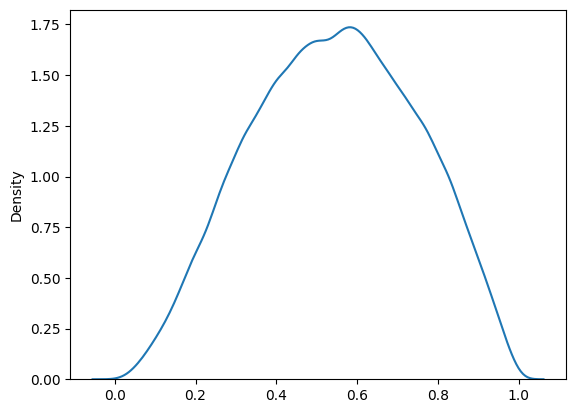

In [ ]:
arr=generate_kumarswamyexp(1,2,3)
sns.kdeplot(arr)

<Axes: ylabel='Density'>

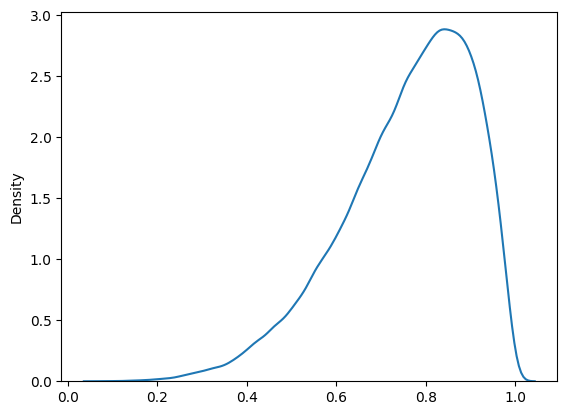

In [ ]:
arr=generate_kumarswamyexp(5,2,1)
sns.kdeplot(arr)

<Axes: ylabel='Density'>

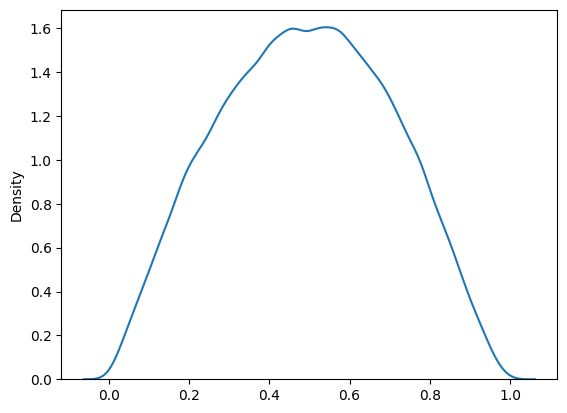

In [ ]:
arr=generate_kumarswamyexp(2,2.5,1)
sns.kdeplot(arr)

In [3]:
 def cdf(x,alpha=1,beta=2,gamma=3):
   if(x<0):
     return 0
   if (x>1):
     return 1
   return np.power((1-np.power(1-np.power(x,alpha),beta)),gamma)

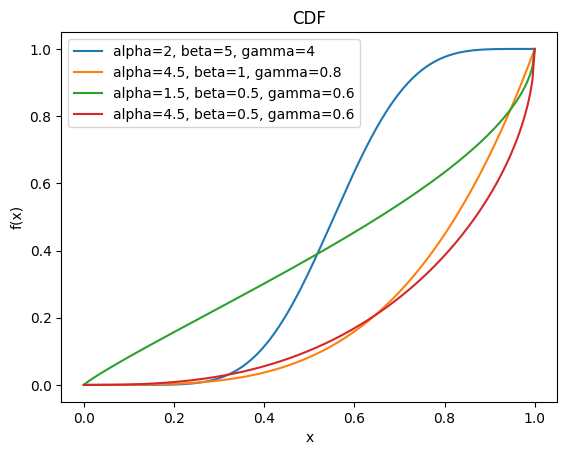

In [4]:
# Define the range of x values to plot
x_values = np.linspace(0, 1, 200)

# Plot the PDF for different parameter values
for alpha, beta, gamma in [(2, 5, 4), (4.5, 1, 0.8), (1.5, 0.5, 0.6),(4.5,.5,.6)]:
    pdf_values = [cdf(x, alpha, beta, gamma) for x in x_values]
    plt.plot(x_values, pdf_values, label=f"alpha={alpha}, beta={beta}, gamma={gamma}")

# Add labels and legend to the plot
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("CDF")
#plt.legend(bbox_to_anchor=(1.04, 0.5),loc="upper left")
plt.legend()

# Show the plot
plt.show()
#This code generates a plot of the gamma Gompertz PDF for three different parameter sets: (a=2, b=2, c=1), (a=4, b=1, c=2), and (a=1, b=3, c=1). The resulting plot shows how the shape, scale, and location parameters affect the shape of the distribution.


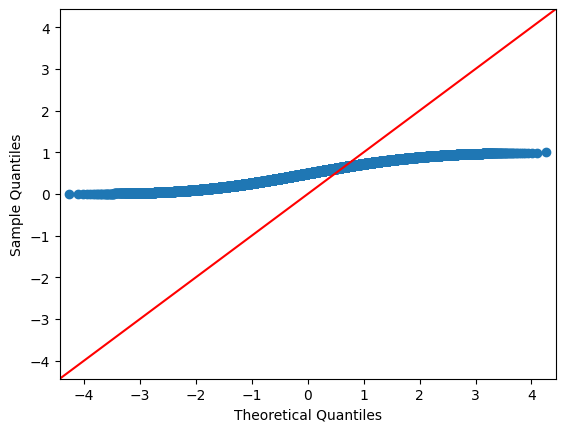

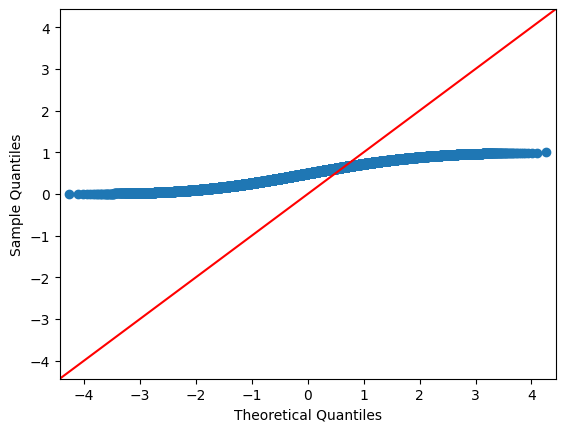

In [ ]:
arr=np.array(arr)
sm.qqplot(arr, line ='45')

In [ ]:
sc.ks_1samp(arr,cdf) 

KstestResult(statistic=0.09275531610537213, pvalue=0.0, statistic_location=0.45698571491003914, statistic_sign=1)

In [5]:
def generate_data( alpha, beta, gamma_1, gamma_2,pt=100000):
  arr=[]
  cause=[]
  for i in range(pt):
    x=np.random.uniform(low=0,high=1)
    y1=np.power((1-np.power((1-np.power(x,(1/gamma_1))),(1/beta))),(1/alpha))
    x=np.random.uniform(low=0,high=1)
    y2=np.power((1-np.power((1-np.power(x,(1/gamma_2))),(1/beta))),(1/alpha))
    if(y1<y2):
      cause.append(1)
    else:
      cause.append(2)
    y=min(y1,y2)  
    arr.append(y)
  return arr,cause 

<Axes: ylabel='Density'>

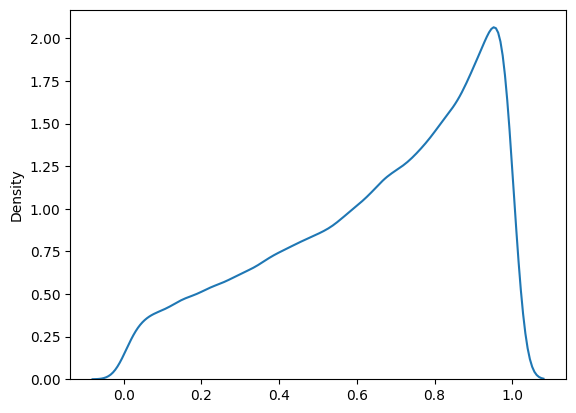

In [6]:
sample_1,c_1 = generate_data(0.5,0.5,2,3)
sns.kdeplot(sample_1)

<Axes: ylabel='Density'>

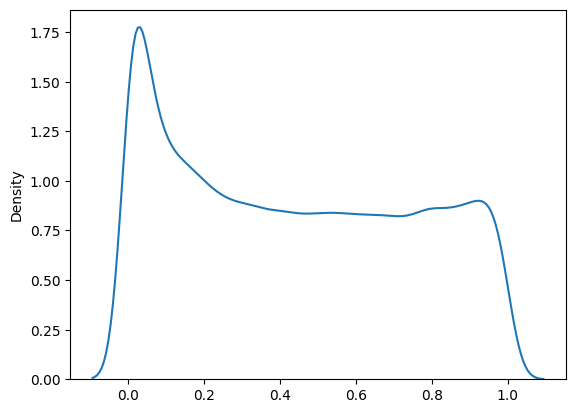

In [7]:
sample_2,cause_2=generate_data(0.5,0.5,1,2)
sns.kdeplot(sample_2)

<Axes: ylabel='Density'>

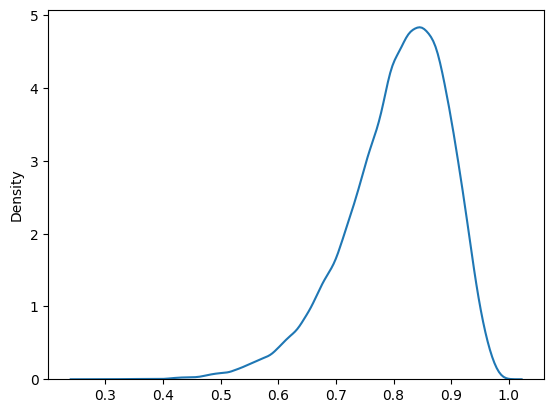

In [8]:
sample_3,cause_3=generate_data(5,2,2,3)
sns.kdeplot(sample_3)

<Axes: ylabel='Density'>

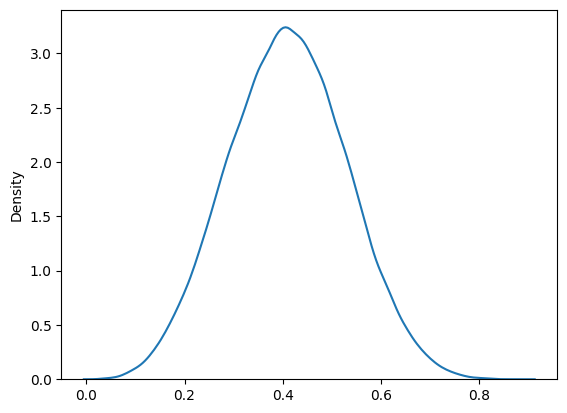

In [9]:
sample_4,cause_4=generate_data(2,5,2,3)
sns.kdeplot(sample_4)

In [11]:
np.savetxt('sample_1.csv',sample_1, delimiter=',')
#Running the example will define a NumPy array

In [12]:
np.savetxt('sample_2.csv',sample_2, delimiter=',')

In [13]:
np.savetxt('sample_3.csv',sample_3, delimiter=',')

In [14]:
np.savetxt('sample_4.csv',sample_4, delimiter=',')


In [16]:
np.savetxt('cause_1.csv',c_1, delimiter=',')


In [17]:
np.savetxt('cause_2.csv',cause_2, delimiter=',')

In [18]:
np.savetxt('cause_3.csv',cause_3, delimiter=',')

In [19]:
np.savetxt('cause_4.csv',cause_4, delimiter=',')

In [ ]:
# Function to calcalute the estimated value using multi dimensional newton raphson
def estimated_value(data,cause):
  data=np.array(data)
  alpha, beta, gamma_1, gamma_2 = symbols('alpha beta gamma_1 gamma_2')
  l=0
  for i in range(1,10):
    l+=log(alpha*beta)+(alpha-1)*log(data_1[i])+(alpha-1)*log(1-data_1[i]**(alpha))
    if(cause_1[i]==1):
      l+=log(beta)+(beta-1)*log(1-(1-(data_1[i]**alpha)**beta))+log(1-(1-(1-(data_1[i]**alpha)**beta)**gamma_1))
    else:
      l+=log(gamma_2)+(gamma_2-1)*log(1-(1-(data_1[i]**alpha)**beta))+log(1-(1-(1-(data_1[i]**alpha)**beta)**gamma_1))
 
  del_alpha=diff(l,alpha)
  del_beta=diff(l,beta)
  del_gamma_1=diff(l,gamma_1)
  del_gamma_2=diff(l,gamma_2)
  
  ##defining the hessian matrix using derivatives
  f11=diff(del_alpha,alpha)
  f12=diff(del_alpha,beta)
  f13=diff(del_alpha,gamma_1)
  f14=diff(del_alpha,gamma_2)
  f21=diff(del_beta,alpha)
  f22=diff(del_beta,beta)
  f23=diff(del_beta,gamma_1)
  f24=diff(del_beta,gamma_2)
  f31=diff(del_gamma_1,alpha)
  f32=diff(del_gamma_1,beta)
  f33=diff(del_gamma_1,gamma_1)
  f34=diff(del_gamma_1,gamma_2)
  f41=diff(del_gamma_2,alpha)
  f42=diff(del_gamma_2,beta)
  f43=diff(del_gamma_2,gamma_1)
  f44=diff(del_gamma_2,gamma_2)

  ##Inital guess##
  a1=0.5
  b1=0.5
  c1=1.9
  d1=2.9

  for i in range(3):
    a=f11.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    b=f12.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    c=f13.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    d=f14.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    e=f21.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    f=f22.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    g=f23.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    h=f24.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    i=f31.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    j=f32.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    k=f33.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    l=f34.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    m=f41.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    n=f42.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    o=f43.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    p=f44.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])

    hessmat=Matrix([[a,b,c,d],[e,f,g,h],[i,j,k,l],[m,n,o,p]])##the hessian matrix
    #hessmat=np.Int64(hessmat)
    inverse=hessmat.inv()# calcaulating the inverse

    y=np.zeros(4)
    y[0]=del_alpha.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    y[1]=del_beta.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    y[2]=del_gamma_1.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])
    y[3]=del_gamma_2.subs([(alpha,a1),(beta,b1),(gamma_1,c1),(gamma_2,d1)])

    z=inverse*y
    a1-=z[0]
    b1-=z[1]
    c1-=z[2]
    d1-=z[3]
  
  res=Matrix([a1,b1,c1,d1])
  #res.append(al)
  #res.append(b1)
  #res.append(c1)
  #res.append(d1)

  return res

In [ ]:
res=estimated_value(data_1,cause_1)

KeyboardInterrupt: ignored

In [ ]:
print(res)

Matrix([[0.450426193225925], [0.787542332302728], [1.56693868429624], [1.16744339791353]])


In [ ]:
!pip3 install pygad
import pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 KB 3.0 MB/s eta 0:00:00


In [ ]:
def likelihood(x):
  x=np.array(x)
  if np.any(x<0):
    return float('inf')
  x=np.abs(x)
  x=x.astype('complex128')
  fun=0
  for i in range(1,1000):
    fun+=np.log(x[0]*x[1])+(x[0]-1)*np.log(data_1[i])+(x[1]-1)*np.log(1-data_1[i]**(x[0]))
    if(cause_1[i]==1):
      fun+=np.log(x[2])+(x[2]-1)*np.log(1-(1-(data_1[i]**x[0])**x[1]))+np.log(1-(1-(1-(data_1[i]**x[0])**x[1])**x[3]))
    else:
      fun+=np.log(x[3])+(x[3]-1)*np.log(1-(1-(data_1[i]**x[0])**x[1]))+np.log(1-(1-(1-(data_1[i]**x[0])**x[1])**x[2]))
  fun=-1*(fun) 
  fun=fun.astype('float64')
  if(fun>0):
    return float('inf')  
  return fun


In [ ]:
likelihood([0.23529053, 0.24684082, 1.90929199, 3.60985352])

<ipython-input-163-cde50e5108ca>:11: RuntimeWarning: divide by zero encountered in log
  fun+=np.log(x[2])+(x[2]-1)*np.log(1-(1-(data_1[i]**x[0])**x[1]))+np.log(1-(1-(1-(data_1[i]**x[0])**x[1])**x[3]))
<ipython-input-163-cde50e5108ca>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')


-inf

In [ ]:
likelihood([0.5,0.5,2,3])

<ipython-input-163-cde50e5108ca>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')


-6268.06293294502

In [ ]:
x=np.zeros(3)

In [ ]:
if x.any()>-1 :
  print('yes')

yes


In [ ]:
x0=[.3,.3,1.8,2.8]
x0=np.array(x0)

In [ ]:
res = minimize(likelihood, x0,method='nelder-mead')#n=20
print(res.x)

<ipython-input-14-f79ab94440e6>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_optimize.py:863: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


[0.4 0.4 1.9 2.9]


In [ ]:
res = minimize(likelihood, x0,method='Nelder-Mead')#n=100
print(res.x)

<ipython-input-14-f79ab94440e6>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')


[0.4 0.4 1.9 2.9]


In [ ]:
res = minimize(likelihood, x0,method='Nelder-Mead')#n=1000
print(res.x)

<ipython-input-14-f79ab94440e6>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')


[0.4 0.4 1.9 2.9]


In [ ]:
print(res)

       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: inf
             x: [ 4.000e-01  4.000e-01  1.900e+00  2.900e+00]
           nit: 133
          nfev: 800
 final_simplex: (array([[ 4.000e-01,  4.000e-01,  1.900e+00,  2.900e+00],
                       [ 4.000e-01,  4.000e-01,  1.900e+00,  2.900e+00],
                       ...,
                       [ 4.000e-01,  4.000e-01,  1.900e+00,  2.900e+00],
                       [ 4.000e-01,  4.000e-01,  1.900e+00,  2.900e+00]]), array([       inf,        inf,        inf,        inf,
                              inf]))


In [ ]:
print(res.x)

[0.4 0.4 1.9 2.9]


In [ ]:
global n2
global n1

In [ ]:

n1=cause_1.count(1)

n2=cause_1.count(2)

In [ ]:
def loglikelihood_1(x):
  x=np.array(x)
  if(np.any(x<0)):
    return [float('inf'),float('inf'),float('inf'),float('inf')]
  x=np.abs(x)
  x=x.astype('complex128')
  fun=[0,0,0,0]
  for i in range(1,20):
    logx=np.log(data_1[i]) #log(xi)
    xa=np.power(data_1[i],x[0]) #(1-x^alpha)
    logx2=np.log(1-xa) #log(1-xi^alpha)
    xa2=1-np.power(1-xa,x[1]) #1-(1-x^alpha)^beta
    logx3=np.log(1-xa2) #log(1-(1-x^alpha)^beta)
    const1=x[1]*(np.power(xa,x[1]-1))*(data_1[i]**x[0])*(logx)
    const2=1-xa2*logx2    
    a=1/x[0]+logx+-(x[1]-1)*(xa*logx)/(1-xa)
    b=1/x[1]+logx2
    c=0
    d=0
    if(cause_1[i]==1):
      a+=((x[2]-1)*const1)/(1-xa2)-(const1*(x[3]*np.power(1-xa2,x[3]-1)))/(1-np.power(1-xa2,x[3]))
      b+=((x[3]*(np.power(xa2,x[3]-1)*const2)))/(1-np.power(xa2,x[3]))-((const2)*(x[2]-1))/(xa2)
      c+=1/x[2]+logx3
      d+=1/x[3]-(np.power(xa2,x[3]))*(logx3)/(1-np.power(xa2,x[3]))
    else:
      a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
      b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
      d+=1/x[3]+logx3
      c+=1/x[2]-(np.power(xa2,x[2]))*(logx3)/(1-np.power(xa2,x[2]))
    fun=np.add(fun,[a,b,c,d])
  fun=fun.astype('float64')
  return fun

In [ ]:
def loglikelihood_2(x):
  x=np.array(x)
  if(np.any(x<0)):
    return [float('inf'),float('inf'),float('inf'),float('inf')]
  x=np.abs(x)
  x=x.astype('complex128')
  fun=[0,0,0,0]
  for i in range(1,50):
    logx=np.log(data_1[i]) #log(xi)
    xa=np.power(data_1[i],x[0]) #(1-x^alpha)
    logx2=np.log(1-xa) #log(1-xi^alpha)
    xa2=1-np.power(1-xa,x[1]) #1-(1-x^alpha)^beta
    logx3=np.log(1-xa2) #log(1-(1-x^alpha)^beta)
    const1=x[1]*(np.power(xa,x[1]-1))*(data_1[i]**x[0])*(logx)
    const2=1-xa2*logx2    
    a=1/x[0]+logx+-(x[1]-1)*(xa*logx)/(1-xa)
    b=1/x[1]+logx2
    c=0
    d=0
    if(cause_1[i]==1):
      a+=((x[2]-1)*const1)/(1-xa2)-(const1*(x[3]*np.power(1-xa2,x[3]-1)))/(1-np.power(1-xa2,x[3]))
      b+=((x[3]*(np.power(xa2,x[3]-1)*const2)))/(1-np.power(xa2,x[3]))-((const2)*(x[2]-1))/(xa2)
      c+=1/x[2]+logx3
      d+=1/x[3]-(np.power(xa2,x[3]))*(logx3)/(1-np.power(xa2,x[3]))
    else:
      a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
      b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
      d+=1/x[3]+logx3
      c+=1/x[2]-(np.power(xa2,x[2]))*(logx3)/(1-np.power(xa2,x[2]))
    fun=np.add(fun,[a,b,c,d])
  fun=fun.astype('float64')
  return fun

In [ ]:
def loglikelihood_3(x):
  x=np.array(x)
  if(np.any(x<0)):
    return [float('inf'),float('inf'),float('inf'),float('inf')]
  x=np.abs(x)
  x=x.astype('complex128')
  fun=[0,0,0,0]
  for i in range(1,100):
    logx=np.log(data_1[i]) #log(xi)
    xa=np.power(data_1[i],x[0]) #(1-x^alpha)
    logx2=np.log(1-xa) #log(1-xi^alpha)
    xa2=1-np.power(1-xa,x[1]) #1-(1-x^alpha)^beta
    logx3=np.log(1-xa2) #log(1-(1-x^alpha)^beta)
    const1=x[1]*(np.power(xa,x[1]-1))*(data_1[i]**x[0])*(logx)
    const2=1-xa2*logx2    
    a=1/x[0]+logx+-(x[1]-1)*(xa*logx)/(1-xa)
    b=1/x[1]+logx2
    c=0
    d=0
    if(cause_1[i]==1):
      a+=((x[2]-1)*const1)/(1-xa2)-(const1*(x[3]*np.power(1-xa2,x[3]-1)))/(1-np.power(1-xa2,x[3]))
      b+=((x[3]*(np.power(xa2,x[3]-1)*const2)))/(1-np.power(xa2,x[3]))-((const2)*(x[2]-1))/(xa2)
      c+=1/x[2]+logx3
      d+=1/x[3]-(np.power(xa2,x[3]))*(logx3)/(1-np.power(xa2,x[3]))
    else:
      a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
      b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
      d+=1/x[3]+logx3
      c+=1/x[2]-(np.power(xa2,x[2]))*(logx3)/(1-np.power(xa2,x[2]))
    fun=np.add(fun,[a,b,c,d])
  fun=fun.astype('float64')
  return fun

In [ ]:
loglikelihood([0.5,0.5,2,3])

<ipython-input-20-6f40900b7fc4>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')


array([ 5261.62760584, 82165.182038  , 12702.32542648,  8416.25590519])

In [ ]:
# Initialize estimator_1 as an empty list
estimator_1 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 2000, 20):
    data_1 = sample_1[i:i+21]
    cause_1 = c_1[i:i+20]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_1.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_1 = np.array(estimator_1)

# Calculate the mean of estimator_1
mean_estimator_1 = np.mean(estimator_1, axis=0) 

var_estimator_1=np.var(estimator_1,axis=0)

<ipython-input-25-85c0d7aedff6>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_nonlin.py:912: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
<ipython-input-25-85c0d7aedff6>:13: RuntimeWarning: divide by zero encountered in log
  logx3=np.log(1-xa2) #log(1-(1-x^alpha)^beta)
<ipython-input-25-85c0d7aedff6>:26: RuntimeWarning: divide by zero encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-25-85c0d7aedff6>:26: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-25-85c0d7aedff6>:27: RuntimeWarning: divide by zero encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
<ip

In [ ]:
mean_estimator_1

array([0.74523467, 0.48614616, 1.97481993, 2.88171378])

In [ ]:
var_estimator_1=np.var(estimator_1,axis=0)
var_estimator_1

array([0.27593785, 0.19965202, 0.22660006, 0.07411707])

In [ ]:
# Initialize estimator_1 as an empty list
estimator_1 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 5001, 50):
    data_1 = sample_1[i:i+51]
    cause_1 = c_1[i:i+51]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_1.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_1 = np.array(estimator_1)

# Calculate the mean of estimator_1
mean_estimator_1_2 = np.mean(estimator_1, axis=0) 
var_estimator_1_2=np.var(estimator_1,axis=0)
print(mean_estimator_1_2)
print(var_estimator_1_2)

<ipython-input-42-1ce2d2d84f6b>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')
<ipython-input-42-1ce2d2d84f6b>:13: RuntimeWarning: divide by zero encountered in log
  logx3=np.log(1-xa2) #log(1-(1-x^alpha)^beta)
<ipython-input-42-1ce2d2d84f6b>:26: RuntimeWarning: divide by zero encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-42-1ce2d2d84f6b>:26: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-42-1ce2d2d84f6b>:27: RuntimeWarning: divide by zero encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
<ipython-input-42-1ce2d2d84f6b>:27: RuntimeWarning: invalid value encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power

[0.80501711 0.57348042 2.00411453 2.89685124]
[0.27486439 0.24740216 0.24926087 0.05909897]


In [ ]:
# Initialize estimator_1 as an empty list
estimator_1_3 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 10001, 100):
    data_1 = sample_1[i:i+1001]
    cause_1 = c_1[i:i+1001]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_1_3.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_1_3 = np.array(estimator_1)

# Calculate the mean of estimator_1
mean_estimator_1_3 = np.mean(estimator_1, axis=0) 
var_estimator_1_3=np.var(estimator_1,axis=0)
print(mean_estimator_1_3)
print(var_estimator_1_3)

<ipython-input-46-e0f51eaaf9d5>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')
<ipython-input-46-e0f51eaaf9d5>:13: RuntimeWarning: divide by zero encountered in log
  logx3=np.log(1-xa2) #log(1-(1-x^alpha)^beta)
<ipython-input-46-e0f51eaaf9d5>:26: RuntimeWarning: divide by zero encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-46-e0f51eaaf9d5>:26: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-46-e0f51eaaf9d5>:27: RuntimeWarning: divide by zero encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
<ipython-input-46-e0f51eaaf9d5>:27: RuntimeWarning: invalid value encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power

[0.80501711 0.57348042 2.00411453 2.89685124]
[0.27486439 0.24740216 0.24926087 0.05909897]


In [ ]:
# Initialize estimator_1 as an empty list
x0=[0.3,0.3,0.7,1.5]
estimator_2 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 2000, 20):
    data_1 = sample_2[i:i+21]
    cause_1 = cause_2[i:i+20]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_1, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2 = np.array(estimator_2)

# Calculate the mean of estimator_1
mean_estimator_2 = np.mean(estimator_2, axis=0) 
var_estimator_2=np.var(estimator_2,axis=0)
#print(mean_estimator_2)
#print(var_estimator_2)

# Initialize estimator_1 as an empty list
estimator_2_2 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 5001, 50):
    data_1 = sample_2[i:i+51]
    cause_1 = cause_2[i:i+51]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_2, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2_2.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2_2 = np.array(estimator_2_2)

# Calculate the mean of estimator_1
mean_estimator_2_2 = np.mean(estimator_2_2, axis=0) 
var_estimator_2_2=np.var(estimator_2_2,axis=0)
#print(mean_estimator_2_2)
#print(var_estimator_2_2)

# Initialize estimator_1 as an empty list
estimator_2_3 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 10001, 100):
    data_1 = sample_2[i:i+1001]
    cause_1 = cause_2[i:i+1001]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_3, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2_3.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2_3 = np.array(estimator_2_3)

# Calculate the mean of estimator_1
mean_estimator_2_3 = np.mean(estimator_2_3, axis=0) 
var_estimator_2_3=np.var(estimator_2_3,axis=0)
print(mean_estimator_2)
print(var_estimator_2)
print(mean_estimator_2_2)
print(var_estimator_2_2)
print(mean_estimator_2_3)
print(var_estimator_2_3)

<ipython-input-48-24c583f885a1>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_nonlin.py:912: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
<ipython-input-48-24c583f885a1>:26: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-48-24c583f885a1>:27: RuntimeWarning: divide by zero encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
<ipython-input-48-24c583f885a1>:27: RuntimeWarning: invalid value encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
<ipython-input-48-24c583f885a1>:21: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[2]-1)*const1)/(1-xa2)-(const1*(x[

[1.03038834 1.25125421 1.68780082 2.51765684]
[0.86722146 3.64300815 2.04153452 2.95066605]
[1.10760177 1.59396361 1.26335985 1.84219134]
[0.3876709  2.52375288 0.64070758 0.84387137]
[0.9077753  1.32377645 1.00136957 1.70372264]
[0.21638243 1.90097964 0.4873889  0.42229506]


In [ ]:
# Initialize estimator_1 as an empty list
x0=[4,1.7,1.7,2.7]
estimator_2 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 2000, 20):
    data_1 = sample_3[i:i+21]
    cause_1 = cause_3[i:i+20]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_1, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2 = np.array(estimator_2)

# Calculate the mean of estimator_1
mean_estimator_2 = np.mean(estimator_2, axis=0) 
var_estimator_2=np.var(estimator_2,axis=0)
#print(mean_estimator_2)
#print(var_estimator_2)

# Initialize estimator_1 as an empty list
estimator_2_2 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 5001, 50):
    data_1 = sample_3[i:i+51]
    cause_1 = cause_3[i:i+51]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_2, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2_2.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2_2 = np.array(estimator_2_2)

# Calculate the mean of estimator_1
mean_estimator_2_2 = np.mean(estimator_2_2, axis=0) 
var_estimator_2_2=np.var(estimator_2_2,axis=0)
#print(mean_estimator_2_2)
#print(var_estimator_2_2)

# Initialize estimator_1 as an empty list
estimator_2_3 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 10001, 100):
    data_1 = sample_3[i:i+1001]
    cause_1 = cause_3[i:i+1001]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_3, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2_3.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2_3 = np.array(estimator_2_3)

# Calculate the mean of estimator_1
mean_estimator_2_3 = np.mean(estimator_2_3, axis=0) 
var_estimator_2_3=np.var(estimator_2_3,axis=0)
print(mean_estimator_2)
print(var_estimator_2)
print(mean_estimator_2_2)
print(var_estimator_2_2)
print(mean_estimator_2_3)
print(var_estimator_2_3)

<ipython-input-48-24c583f885a1>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_nonlin.py:912: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
<ipython-input-48-24c583f885a1>:13: RuntimeWarning: divide by zero encountered in log
  logx3=np.log(1-xa2) #log(1-(1-x^alpha)^beta)
<ipython-input-48-24c583f885a1>:21: RuntimeWarning: divide by zero encountered in cdouble_scalars
  a+=((x[2]-1)*const1)/(1-xa2)-(const1*(x[3]*np.power(1-xa2,x[3]-1)))/(1-np.power(1-xa2,x[3]))
<ipython-input-48-24c583f885a1>:21: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[2]-1)*const1)/(1-xa2)-(const1*(x[3]*np.power(1-xa2,x[3]-1)))/(1-np.power(1-xa2,x[3]))
<ipython-input-48-24c583f885a1>:22: RuntimeWarning: divide by zero encountered in cdouble_scalars
  b+=((x[3]*(np.power(xa2,x[3]-1)*const2)))/(1-np.power(xa2,x[3]))-((const2)*(x[2]-1))/(xa2)
<ip

[4.14044821 1.36275624 2.72491879 3.21626497]
[6.04319617 1.65805112 1.43482146 2.91226399]
[4.73112269 1.67845337 2.45712711 3.02129788]
[9.04563472 4.01552414 1.00239382 2.83752052]
[4.49988615 1.69970778 2.64280878 2.82279222]
[5.07793443 2.84641881 1.83301398 1.12502252]


In [ ]:
# Initialize estimator_1 as an empty list
x0=[1.5,4.5,1.7,2.5]
estimator_2 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 2000, 20):
    data_1 = sample_4[i:i+21]
    cause_1 = cause_4[i:i+20]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_1, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2 = np.array(estimator_2)

# Calculate the mean of estimator_1
mean_estimator_2 = np.mean(estimator_2, axis=0) 
var_estimator_2=np.var(estimator_2,axis=0)
#print(mean_estimator_2)
#print(var_estimator_2)

# Initialize estimator_1 as an empty list
estimator_2_2 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 5001, 50):
    data_1 = sample_4[i:i+51]
    cause_1 = cause_4[i:i+51]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_2, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2_2.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2_2 = np.array(estimator_2_2)

# Calculate the mean of estimator_1
mean_estimator_2_2 = np.mean(estimator_2_2, axis=0) 
var_estimator_2_2=np.var(estimator_2_2,axis=0)
#print(mean_estimator_2_2)
#print(var_estimator_2_2)

# Initialize estimator_1 as an empty list
estimator_2_3 = []

# Loop over the range of data points with an increment of 20
for i in range(0, 10001, 100):
    data_1 = sample_4[i:i+1001]
    cause_1 = cause_4[i:i+1001]
    #x0 = np.array([initial_value_1, initial_value_2])  # Define initial values for optimization
    sol = op.root(loglikelihood_3, x0, method='broyden1')  # Estimate parameters using Broyden's method
    estimator_2_3.append(sol.x)

# Convert estimator_1 to a numpy array
estimator_2_3 = np.array(estimator_2_3)

# Calculate the mean of estimator_1
mean_estimator_2_3 = np.mean(estimator_2_3, axis=0) 
var_estimator_2_3=np.var(estimator_2_3,axis=0)
print(mean_estimator_2)
print(var_estimator_2)
print(mean_estimator_2_2)
print(var_estimator_2_2)
print(mean_estimator_2_3)
print(var_estimator_2_3)

<ipython-input-48-24c583f885a1>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fun=fun.astype('float64')
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_nonlin.py:912: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
<ipython-input-48-24c583f885a1>:26: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[3]-1)*const1)/(1-xa2)-(const1*(x[2]*np.power(1-xa2,x[2]-1)))/(1-np.power(1-xa2,x[2]))
<ipython-input-48-24c583f885a1>:27: RuntimeWarning: divide by zero encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
<ipython-input-48-24c583f885a1>:27: RuntimeWarning: invalid value encountered in cdouble_scalars
  b+=((x[2]*(np.power(xa2,x[2]-1)*const2)))/(1-np.power(xa2,x[2]))-((const2)*(x[3]-1))/(xa2)
<ipython-input-48-24c583f885a1>:21: RuntimeWarning: invalid value encountered in cdouble_scalars
  a+=((x[2]-1)*const1)/(1-xa2)-(const1*(x[

[  3.02818756 321.51900742  11.66556552  94.69938485]
[6.97713868e+00 4.88510891e+06 3.19908058e+03 1.36153650e+05]
[ 2.15165056 10.29501666  7.58476316 13.38270446]
[  3.20350025 425.20617822 438.93389975 894.1359524 ]
[1.85821631 5.57130754 6.27745673 5.52670195]
[  1.87217452  83.35020518 184.45350593  71.34785801]
